# Libraries Imported:
Used pandas, numpy, matplotlib.pyplot, and seaborn for data manipulation, numerical operations, and visualization.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Loading:
Loaded the dataset from railway.csv into a DataFrame (df).

In [5]:
# Load the dataset
file_path = "railway.csv"
df = pd.read_csv(file_path)

In [6]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,12/8/2023,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,1/1/2024,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,12/16/2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,1/1/2024,9:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,12/19/2023,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,1/2/2024,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,12/20/2023,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,1/1/2024,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,12/27/2023,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,1/1/2024,16:45:00,19:00:00,19:00:00,On Time,NaN,No


# Initial Data Exploration
Displayed the first 5 rows (df.head()) to understand the structure.
Checked basic info (df.info()) and missing values (df.isnull().sum()):
Total rows: 31,653
Columns: 18 (e.g., Transaction ID, Price, Journey Status)
Notable missing values: Railcard (20,918), Actual Arrival Time (1,880), Reason for Delay (27,481).

In [8]:
print("Initial Data Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-nul

#  Checking for Duplicates
Confirmed no duplicate rows exist (df.duplicated().sum() = 0).

In [10]:
print("Total duplicate rows:", df.duplicated().sum())

Total duplicate rows: 0


# Handling missing values

In [12]:
#for delay reasons
reason_mapping = {
    "Signal failure": "Signal Failure", 
    "Staffing": "Staff Shortage",
    "Weather": "Weather Conditions"      
}
df["Reason for Delay"] = df["Reason for Delay"].replace(reason_mapping)
df["Reason for Delay"].fillna("No Delay", inplace=True)
# Fill missing numeric values with the median
df.fillna(df.median(numeric_only=True), inplace=True)
# actual arrival time 
df["Actual Arrival Time"] = df["Actual Arrival Time"].fillna(np.nan)

df['Railcard'] = df['Railcard'].fillna("Don't have rail card")






C:\Users\FreeComp\AppData\Local\Temp\ipykernel_1836\3212396691.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Reason for Delay"].fillna("No Delay", inplace=True)


# Handling outliers in the 'Price' column using IQR

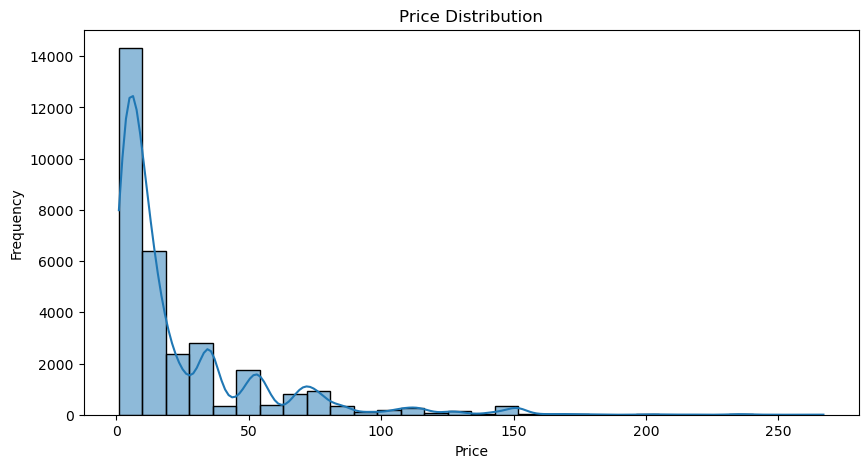

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [15]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

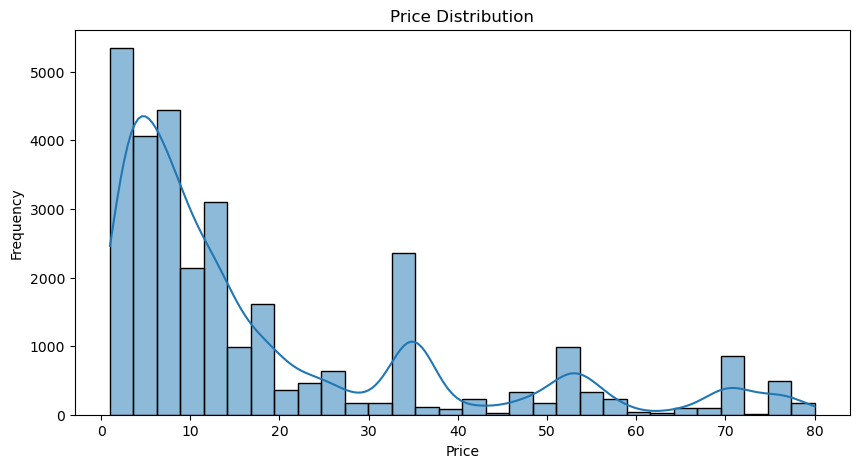

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Normalization for Price

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Price_Normalized'] = scaler.fit_transform(df[['Price']])

# Correlation Visualization:
Created a heatmap to show correlations between numerical features (only 'Price' was numeric), though the dataset had limited numeric columns for meaningful correlation.

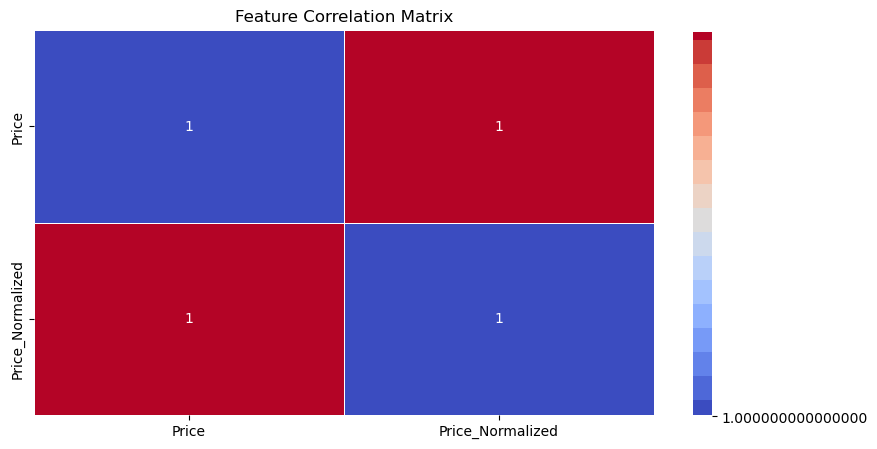

In [20]:
# For numerical data only 
#there are other data types like strings and more..
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


# Save cleaned dataset

In [37]:
df.to_csv("W:\DEPI_Project/cleaned_railway.csv", index=False)
print("Data Preprocessing Complete. Cleaned dataset saved.")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\FreeComp\AppData\Local\Temp\ipykernel_1836\3901989423.py:1: SyntaxWarning: invalid escape sequence '\D'
  df.to_csv("W:\DEPI_Project/cleaned_railway.csv", index=False)


Data Preprocessing Complete. Cleaned dataset saved.


In [23]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Price_Normalized
0,da8a6ba8-b3dc-4677-b176,12/8/2023,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,1/1/2024,11:00:00,13:30:00,13:30:00,On Time,No Delay,No,0.531646
1,b0cdd1b0-f214-4197-be53,12/16/2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,1/1/2024,9:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,0.278481
2,f3ba7a96-f713-40d9-9629,12/19/2023,19:51:27,Online,Credit Card,Don't have rail card,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,1/2/2024,18:15:00,18:45:00,18:45:00,On Time,No Delay,No,0.025316
3,b2471f11-4fe7-4c87-8ab4,12/20/2023,23:00:36,Station,Credit Card,Don't have rail card,Standard,Advance,13,London Paddington,Reading,1/1/2024,21:30:00,22:30:00,22:30:00,On Time,No Delay,No,0.151899
4,2be00b45-0762-485e-a7a3,12/27/2023,18:22:56,Online,Contactless,Don't have rail card,Standard,Advance,76,Liverpool Lime Street,London Euston,1/1/2024,16:45:00,19:00:00,19:00:00,On Time,No Delay,No,0.949367
